In [1]:
import pandas as pd
import numpy as np
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


Встроенные датасеты (кластеры) вызываются командой библиотеки sklearn

(-10, 10)

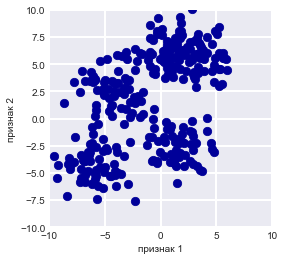

In [2]:
from sklearn.datasets import make_blobs
seed = 100
n_data = 300
n_clusters = 5
n_centers = 5

blobs, blob_labels = make_blobs(n_samples=n_data, n_features=2,
                                centers=n_centers, random_state=seed,
                                cluster_std=2)


blobs *= 0.75
blobs += 1.1

plt.figure(figsize=(4, 4))

plt.scatter(blobs[:, 0], blobs[:, 1], s=70,
            color='#000099',  linewidth=0.8)

plt.xlabel('признак 1')
plt.ylabel('признак 2')

plt.grid(lw=2)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
#c=clusters_blob1

Разбиваем данные на массив

In [3]:
make_blobs

<function sklearn.datasets.samples_generator.make_blobs(n_samples=100, n_features=2, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)>

Выводим массив

In [4]:
blobs

array([[-4.04575551, -4.84640816],
       [-3.92415916, -3.05711884],
       [-6.93684205, -3.77179728],
       [-2.06402391,  2.12197645],
       [-4.83103464,  5.49981381],
       [-3.0503124 ,  3.41334241],
       [ 0.87568155, -0.99918862],
       [-8.66185447,  1.43364149],
       [ 3.42896359,  5.85870786],
       [-0.34442489, -3.8702172 ],
       [ 0.75881756,  5.71018766],
       [ 4.56581682,  4.39558987],
       [-3.56243235, -5.08067863],
       [ 2.87674127, -2.90837961],
       [ 2.35974702,  6.61541418],
       [ 0.68580486,  6.2384965 ],
       [ 2.67063245, -1.1201514 ],
       [ 5.09546124,  7.79277222],
       [-0.80785388, -1.67071329],
       [-8.03422622, -4.20372125],
       [-1.59493891,  2.43590131],
       [ 0.61654567, -0.99977821],
       [ 1.09387069, -3.90193659],
       [ 0.40032999,  5.76301383],
       [ 3.57899092,  5.6157743 ],
       [ 0.87439917,  4.91109636],
       [-1.56913137,  0.42484209],
       [ 5.21061334,  3.00305797],
       [-5.44068303,

Определяем, к какой кучке принадлежит каждая точка

In [5]:
blob_labels

array([2, 2, 2, 4, 4, 4, 0, 4, 3, 0, 1, 3, 2, 0, 3, 3, 0, 3, 0, 2, 4, 0,
       0, 1, 3, 1, 2, 3, 4, 2, 4, 0, 0, 0, 4, 3, 1, 3, 1, 3, 2, 3, 4, 1,
       1, 0, 0, 1, 3, 0, 0, 1, 4, 4, 4, 4, 0, 3, 1, 0, 1, 2, 0, 4, 2, 0,
       2, 4, 4, 1, 2, 3, 4, 1, 1, 2, 4, 2, 2, 2, 0, 3, 4, 1, 2, 4, 4, 4,
       4, 1, 2, 2, 1, 0, 1, 2, 4, 1, 1, 2, 1, 2, 4, 2, 2, 0, 3, 1, 2, 3,
       2, 2, 3, 3, 4, 3, 0, 2, 3, 1, 4, 0, 0, 0, 0, 4, 0, 3, 1, 3, 2, 4,
       1, 0, 3, 0, 4, 1, 4, 0, 3, 4, 3, 2, 4, 2, 3, 2, 3, 0, 3, 1, 1, 0,
       1, 2, 0, 2, 1, 3, 4, 0, 0, 1, 1, 1, 1, 4, 2, 3, 4, 1, 3, 3, 0, 1,
       1, 0, 3, 3, 0, 1, 2, 0, 4, 4, 1, 1, 3, 4, 4, 1, 0, 1, 2, 0, 2, 3,
       0, 1, 1, 0, 1, 1, 4, 0, 2, 2, 0, 1, 3, 4, 2, 0, 0, 1, 0, 4, 0, 3,
       4, 2, 2, 4, 3, 1, 4, 2, 4, 3, 3, 3, 3, 4, 0, 1, 1, 2, 4, 3, 2, 0,
       3, 4, 0, 2, 1, 4, 2, 1, 3, 2, 1, 3, 0, 4, 0, 4, 3, 4, 1, 1, 2, 3,
       3, 3, 2, 0, 1, 2, 2, 1, 3, 1, 3, 2, 2, 2, 4, 0, 0, 0, 4, 4, 0, 0,
       4, 1, 2, 3, 2, 4, 3, 2, 4, 3, 3, 2, 3, 3])

Выполняем построение графиков из пяти кучек

(-10, 10)

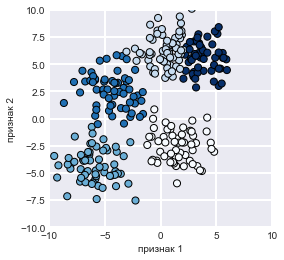

In [6]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5, random_state=0, init='random').fit_predict(blobs)



plt.figure(figsize=(4, 4))

plt.scatter(blobs[:, 0], blobs[:, 1],
            c=clusters, s=50, cmap='Blues',
            edgecolors='black', linewidth=1.0)

plt.xlabel('признак 1')
plt.ylabel('признак 2')

plt.grid(lw=2)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

Отобразим график зависимости между переменными

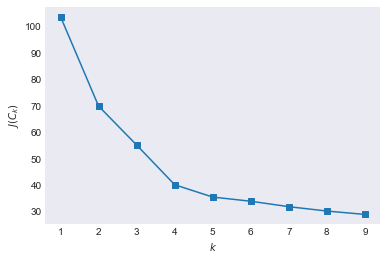

In [7]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(blobs)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

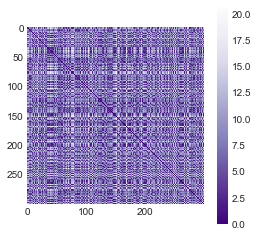

In [8]:
D = (blobs[:,0][:, np.newaxis] - blobs[:,0]) ** 2
D += (blobs[:,1][:, np.newaxis] - blobs[:,1]) ** 2
D = np.sqrt(D)

plt.figure(figsize=(4, 4))
plt.imshow(D, cmap='Purples_r')
plt.colorbar(orientation='vertical', pad=0.06);


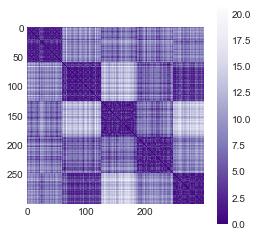

In [9]:
#clusters = KMeans(n_clusters=, random_state=0, init='random').fit_predict(blobs)

i  = np.argsort(clusters)
blobs2 = blobs[i, :]

D = (blobs2[:,0][:, np.newaxis] - blobs2[:,0]) ** 2
D += (blobs2[:,1][:, np.newaxis] - blobs2[:,1]) ** 2
D = np.sqrt(D)

plt.figure(figsize=(4, 4))
plt.imshow(D, cmap='Purples_r')
plt.colorbar(orientation='vertical', pad=0.06);


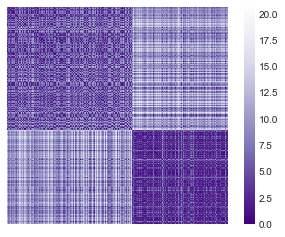

In [10]:
clusters = KMeans(n_clusters=2, random_state=0, init='random').fit_predict(blobs)

i  = np.argsort(clusters)
blobs2 = blobs[i, :]

D = (blobs2[:,0][:, np.newaxis] - blobs2[:,0]) ** 2
D += (blobs2[:,1][:, np.newaxis] - blobs2[:,1]) ** 2
D = np.sqrt(D)

plt.figure(figsize=(5, 4))
plt.imshow(D, cmap='Purples_r', aspect='auto')
plt.xticks([])
plt.yticks([])
plt.colorbar(orientation='vertical', pad=0.06);


Отобразим график с числом кластеров n_clusters = 7

(-10, 10)

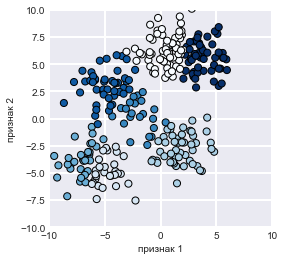

In [11]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=7, random_state=0, init='random').fit_predict(blobs)



plt.figure(figsize=(4, 4))

plt.scatter(blobs[:, 0], blobs[:, 1],
            c=clusters, s=50, cmap='Blues',
            edgecolors='black', linewidth=1.0)

plt.xlabel('признак 1')
plt.ylabel('признак 2')

plt.grid(lw=2)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

Тоже самое с числом кластеров n_clusters = 2, 3 и 4

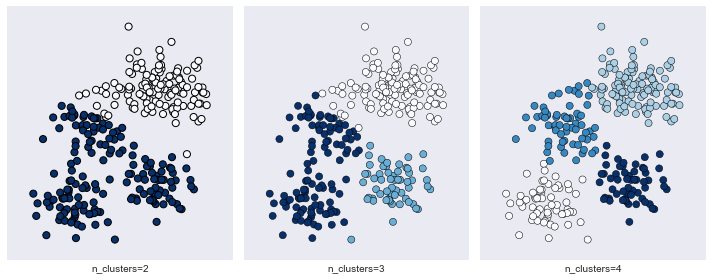

In [12]:
import numpy as np


import matplotlib.pyplot as plt

clusters_blob1 = KMeans(n_clusters=2, random_state=1, init='random').fit_predict(blobs)
clusters_blob2 = KMeans(n_clusters=3, random_state=2, init='random').fit_predict(blobs)
clusters_blob3 = KMeans(n_clusters=4, random_state=3, init='random').fit_predict(blobs)
# Generate data uniformly at random and run k-means
#uniform = np.random.rand(n_data, 2)
#clusters_uniform = KMeans(n_clusters=n_clusters, random_state=seed).fit_predict(uniform)


figure = plt.figure(figsize=(10, 4))

plt.subplot(131)
plt.scatter(blobs[:, 0], blobs[:, 1], c=clusters_blob1, s=50, cmap='Blues', edgecolors='black', linewidth=1.0)
# plt.title("k-mean (1)", fontsize=14)
#plt.axis('off')
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.xlabel('n_clusters=2')
plt.subplot(132)
plt.scatter(blobs[:, 0], blobs[:, 1], c=clusters_blob2, s=50, cmap='Blues', edgecolors='black', linewidth=0.5)
# plt.title("k-mean (2)", fontsize=14)
#plt.axis('off')
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.xlabel('n_clusters=3')
plt.subplot(133)
plt.scatter(blobs[:, 0], blobs[:, 1], c=clusters_blob3, s=50, cmap='Blues', edgecolors='black', linewidth=0.5)
# plt.title("k-mean (2)", fontsize=14)
#plt.axis('off')
plt.axis('equal')
plt.xticks([])
plt.yticks([])
plt.xlabel('n_clusters=4')
plt.tight_layout()

Также такое разделение можно отобразить в виде дерева

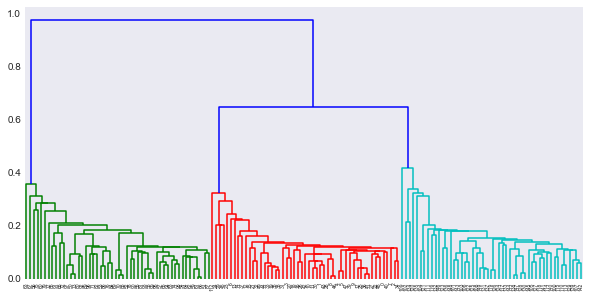

In [13]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)